In [1]:
#Importar las librerias necesarias para trabajar
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

In [2]:
#Abrimos el archivo en un dataframe
aereo = pd.read_csv('AccidentesAviones.csv')

In [3]:
#Miramos el encabezado del dataframe y nos familiarizamos con las columnas
aereo.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
#Miramos el tipo de columnas que manejamos en el dataframe
aereo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [5]:
#Revision de nulos
aereo.isnull().sum()

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

En este dataset de informacion solo hay un valor nuloen la columna route; en los demas no aparecen ningun valor nulo, pero revisando el archivo se detecto de una falta de datos representada por el caracter '?' del cual es necesario conocer su cantidad para determinar su efecto en el archivo

In [6]:
#En la revision de dataset se percato de la aparaicion del caracter ? por lo cual se realiza un 
#analisis de la cantidad de datos a la que corresponde
cantidad = aereo[aereo == '?'].count().sum()

In [7]:
porcentaje_interrogantes = (cantidad / aereo.size) * 100
print('Los caracteres de ? en el dataset original representas el', round(porcentaje_interrogantes,2) ,
      'del total del dataset original')

#Esto nos demuestra que existe una perdida del 8.82% de los archivos correspondientes

Los caracteres de ? en el dataset original representas el 8.82 del total del dataset original


El que el caracter '?' sea de 8.82 nos representa una falta de datos del archivo del 8.82% lo cual evita que se determinen las cifras completas 

In [8]:
#Reemplazamos los ? por nulos para poder trabajarlos mas adelante
aereo.replace('?', np.nan, inplace=True)

In [93]:
aereo.dropna()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,año
0,0,1908-09-17,1718,,Military - U.S. Army,,Demonstration,Wright Flyer III,,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1,1909-09-07,,"Juvisy-sur-Orge, France",,,Air show,Wright Byplane,SC1,,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,,Test flight,Dirigible,,,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
3,3,1913-08-06,,"Victoria, British Columbia, Canada",Private,,,Curtiss seaplane,,,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
4,4,1913-09-09,1830,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),,,20.0,,,14.0,,,0.0,The airship flew into a thunderstorm and encou...,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2021-03-28,1835,"Near Butte, Alaska",Soloy Helicopters,,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598.0,6.0,5.0,1.0,5.0,4.0,1.0,0.0,The sightseeing helicopter crashed after missi...,2021
5004,5004,2021-05-21,1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,,Beechcraft B300 King Air 350i,NAF203,,11.0,7.0,4.0,11.0,7.0,4.0,0.0,"While on final approach, in poor weather condi...",2021
5005,5005,2021-06-10,0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,,Naypyidaw - Anisakan,Beechcraft 1900D,4610,,14.0,12.0,2.0,12.0,11.0,1.0,0.0,The plane was carrying military personnel and ...,2021
5006,5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125.0,96.0,88.0,8.0,50.0,,,3.0,"While attempting to land at Jolo Airport, the ...",2021


Iniciamos las transformaciones correspondientes para poder trabajar los datos

In [9]:
aereo['cn_ln'] = pd.to_numeric(aereo['cn_ln'],errors= 'coerce')

In [10]:
aereo['all_aboard'] = pd.to_numeric(aereo['all_aboard'],errors= 'coerce')
aereo['PASAJEROS A BORDO'] = pd.to_numeric(aereo['PASAJEROS A BORDO'],errors= 'coerce')
aereo['crew_aboard'] = pd.to_numeric(aereo['crew_aboard'],errors= 'coerce')
aereo['cantidad de fallecidos'] = pd.to_numeric(aereo['cantidad de fallecidos'],errors= 'coerce')
aereo['passenger_fatalities'] = pd.to_numeric(aereo['passenger_fatalities'],errors= 'coerce')
aereo['crew_fatalities'] = pd.to_numeric(aereo['crew_fatalities'],errors= 'coerce')
aereo['ground'] = pd.to_numeric(aereo['ground'],errors= 'coerce')

In [11]:
aereo['fecha'] = pd.to_datetime(aereo['fecha'], errors= 'coerce')

In [12]:
aereo['año']= pd.to_datetime(aereo['fecha'], errors= 'coerce').dt.year

In [23]:
#Revisamos que las transformaciones se efectuaran de manera correcta
aereo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   HORA declarada          3504 non-null   object        
 3   Ruta                    5003 non-null   object        
 4   OperadOR                4998 non-null   object        
 5   flight_no               1326 non-null   object        
 6   route                   4245 non-null   object        
 7   ac_type                 4995 non-null   object        
 8   registration            4736 non-null   object        
 9   cn_ln                   3198 non-null   float64       
 10  all_aboard              4991 non-null   float64       
 11  PASAJEROS A BORDO       4787 non-null   float64       
 12  crew_aboard             4789 non-null   float64 

In [16]:
#Hacemos una describcion de los campos numericos del dataframe
aereo.describe()

,Unnamed: 0,fecha,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,año
count,5008.000000,5008,3.198000e+03,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000,5008.000000
mean,2503.500000,1971-05-14 09:57:13.226837072,6.428856e+09,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372,1970.851637
min,0.000000,1908-09-17 00:00:00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,1251.750000,1951-05-07 12:00:00,6.660000e+02,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1951.000000
50%,2503.500000,1970-09-02 12:00:00,4.949000e+03,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000,1970.000000
75%,3755.250000,1992-03-22 12:00:00,2.075650e+04,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,1992.000000
max,5007.000000,2021-07-06 00:00:00,9.773053e+12,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000
std,1445.829404,NaN,2.080366e+11,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544,24.703696


count: número de valores no nulos en la columna

mean: media aritmética de los valores en la columna

std: desviación estándar de los valores en la columna

min: valor mínimo de los valores en la columna

25%: primer cuartil de los valores en la columna

50%: segundo cuartil o mediana de los valores en la columna

75%: tercer cuartil de los valores en la columna

max: valor máximo de los valores en la columna

Iniciamos el proceso para obtener datos que nos permitan graficarlos

In [13]:
#Trabajamos con la columna OperadOR para conocer los operadores que mas involucrados se han visto 
operadores = aereo.groupby('OperadOR')[['OperadOR']].count() #Realizamos el conteo por operador
operadores = operadores.rename(columns={"OperadOR": "Count"})
operadores = operadores.sort_values(by='Count', ascending=False).head(20)#Establecemos la forma de orden

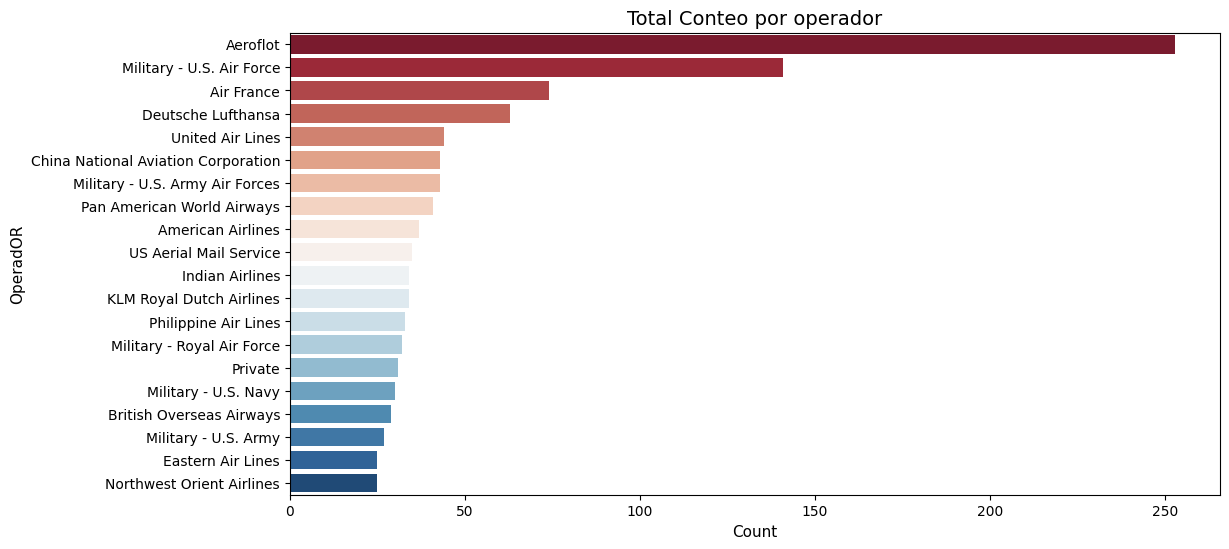

In [40]:
#Graficamos los datos obtenidos en un diagrama de barras apiladas
plt.figure(figsize=(12,6))
sns.barplot(y=operadores.index, x="Count", data=operadores, palette='RdBu', orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('OperadOR', fontsize=11)
plt.title('Total Conteo por operador', loc='Center', fontsize=14)
plt.show()

La grafica anterior nos permite identificar que la aerolinea con mas accidentes es Aeroflot, seguido Military - U.S. Air Force, Air France, Deutsche Lufthansa, United Air Lines en el top 5 de aerolineas con mas accidentes, esto da una guia para revisar a profundidad las medidas de seguridad, para ver si alguno de los motivos de los accidentes puede llegar a ser causado directamente por estas; llegando a modificarlas para la reduccion de los accidentes

In [35]:
#Miramos las rutas de vuelos con mayor accidentalidad
rutas_frecuentes = aereo.groupby('route')[['route']].count()
rutas_frecuentes = rutas_frecuentes.rename(columns={'route': 'Count'})
rutas_frecuentes = rutas_frecuentes.sort_values(by='Count', ascending=False).head(15)

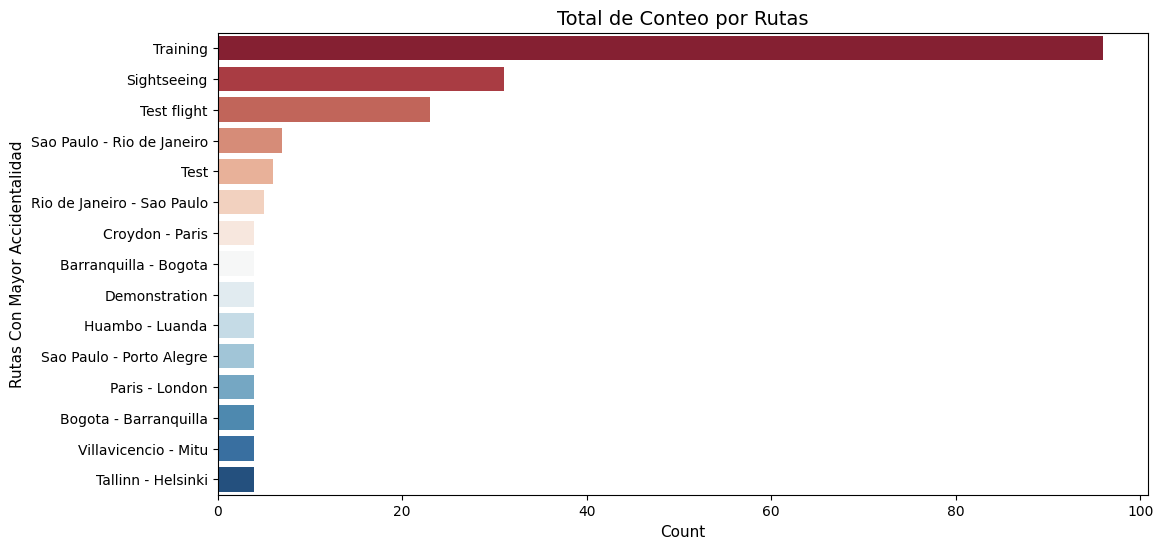

In [41]:
#Graficamos los datos obtenidos anteriormente
plt.figure(figsize=(12,6))
sns.barplot(y=rutas_frecuentes.index, x="Count", data=rutas_frecuentes, palette="RdBu", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Rutas Con Mayor Accidentalidad', fontsize=11)
plt.title('Total de Conteo por Rutas', loc='Center', fontsize=14)
plt.show()

Con base a la grafica anterior se puede afirmar que la mayoria de accidentes se han dado en pruebas, demostraciones y pruebas de vuelos; exceptuando la ruta de Sao Paulo - Rio de Janeiro que aparecen sus dos rutas en el top 10 por lo cual es necesario hacer un estudio sobre las causas de accidentalidad en esta zona y buscar otras rutas posibles hacia el destino que permita hacer este trayecto con mas seguridad

In [18]:
#Miramos los motivos mas comunes de accidentalidad
motivos_comunes = aereo['summary'].value_counts().head(10)
print (motivos_comunes)

summary
Crashed under unknown circumstances.    9
Crashed while en route.                 8
Crashed while attempting to land.       7
Crashed during takeoff.                 6
Crashed into the sea.                   5
Crashed shortly after taking off.       5
Shot down by rebel forces.              4
Crashed under unknown circumstances     4
Crashed en route.                       4
Crashed on takeoff.                     4
Name: count, dtype: int64


In [97]:
#Miramos el tipo de avion con mayor accidentalidad
tipo_avion = aereo.groupby('ac_type')[['ac_type']].count()
tipo_avion = tipo_avion.rename(columns={'ac_type': 'Count'})
tipo_avion = tipo_avion.sort_values(by='Count', ascending=False).head(15)

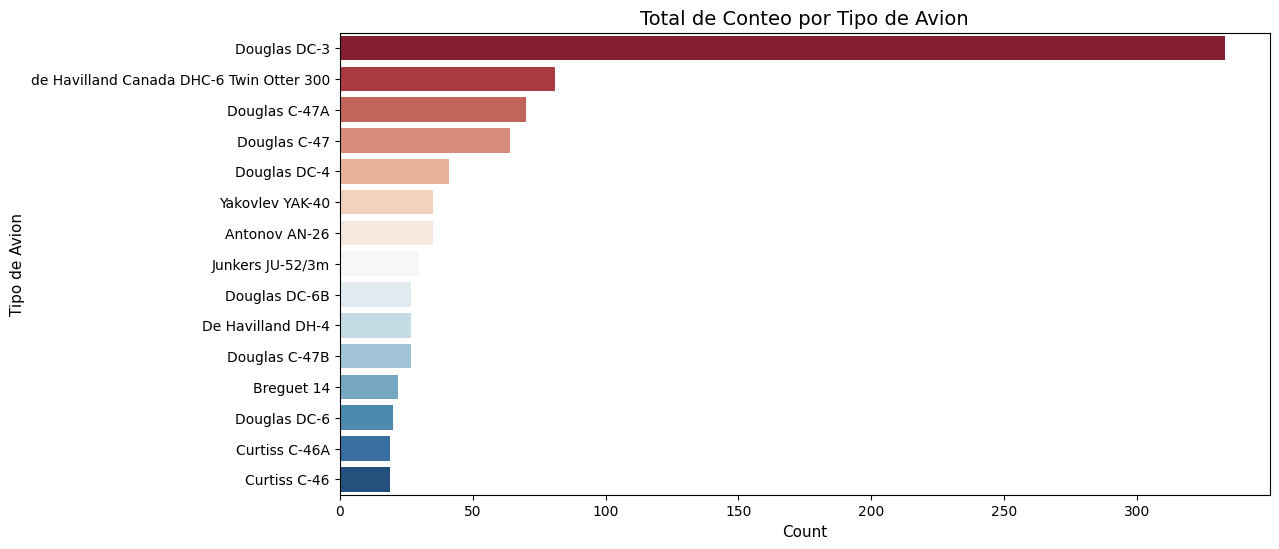

In [99]:
#Graficamos los datos obtenidos anteriormente
plt.figure(figsize=(12,6))
sns.barplot(y=tipo_avion.index, x="Count", data=tipo_avion, palette="RdBu", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Tipo de Avion', fontsize=11)
plt.title('Total de Conteo por Tipo de Avion', loc='Center', fontsize=14)
plt.show()

La grafica anterior nos muestra que en el top 5 de los aviones que tienen mayor accidentalidad cuatro de ellos pertenecen a Douglas lo cual nos hace evaluar el riesgo del uso de estos aviones y causa una advertencia clara sobre las medidas de seguridad que estan implementadas en los controles de seguridad y si son lo suficientemente eficientes 

In [15]:
ruta = aereo.groupby('Ruta')[['Ruta']].count()

In [19]:
rutas = pd.DataFrame()
rutas ['Rutas'] = ruta

In [20]:
rutas.to_csv('rutas.csv')

In [14]:
operador = aereo.groupby('OperadOR')[['OperadOR']].count()

In [21]:
aviones = pd.DataFrame()
aviones['Operador']= operador

In [22]:
aviones.to_csv('aviones.csv')